In [2]:
# Data preprocessing
import konlpy
from konlpy.tag import Hannanum, Kkma, Komoran,Okt
from pprint import pprint


import nltk
from nltk.tokenize import word_tokenize
#nltk.download()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Document representation 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Document classifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing as preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import svm

# Classifier measure
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import re
import sys
import os
import time
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#그래프 스타일 지정
plt.style.use('seaborn') 
# ‘default’,‘dark_background’,‘classic’,‘ggplot’,‘seaborn’

import matplotlib as mpl
mpl.rcParams.update({'font.size':25})

plt.rc('font',family='Malgun Gothic')
#plt.rc('font', family='AppleGothic')

%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_excel('news_baek.xlsx',encoding='utf-8',sheet_name = '백지민')
df.head()

,sents,target
0,차량 내 방송시설과 장비를 활용해 아나운서·기자·라디오DJ·성우 등 다양한 미디어 ...,0.0
1,1회 2시간가량 체험할 수 있다.,0.0
2,"노인·장애인 등 소외계층 관련 기관이나 단체, 도서산간 지역 학교, 공익 목적 일반...",0.0
3,"공모신청은 2월 22일까지 전국 7개 시청자미디어센터(서울, 인천, 부산, 광주, ...",0.0
4,자세한 내용은 시청자미디어재단 홈페이지에서 확인 가능하다.,0.0


In [4]:
df.shape

(99998, 2)

In [5]:
df.isnull().mean()

sents     0.000000
target    0.793166
dtype: float64

In [6]:
data = df.dropna()

In [7]:
data.isnull().mean()

sents     0.0
target    0.0
dtype: float64

In [8]:
data.shape

(20683, 2)

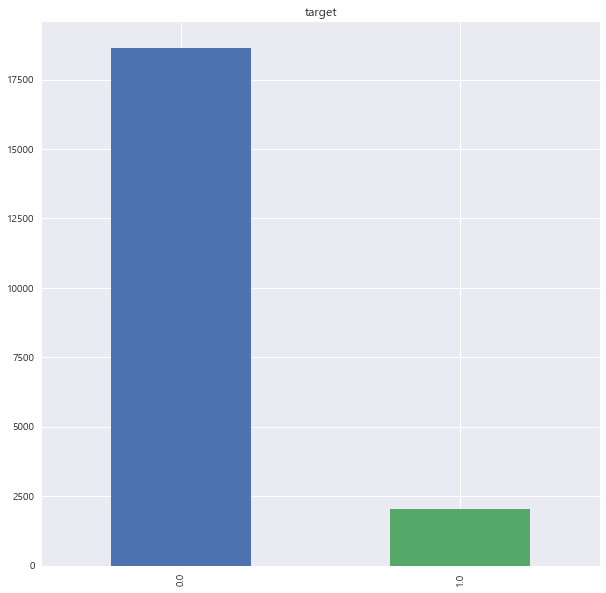

In [9]:
data.target.value_counts().plot.bar(title="target",figsize=(10,10))

In [10]:
data.head()

,sents,target
0,차량 내 방송시설과 장비를 활용해 아나운서·기자·라디오DJ·성우 등 다양한 미디어 ...,0.0
1,1회 2시간가량 체험할 수 있다.,0.0
2,"노인·장애인 등 소외계층 관련 기관이나 단체, 도서산간 지역 학교, 공익 목적 일반...",0.0
3,"공모신청은 2월 22일까지 전국 7개 시청자미디어센터(서울, 인천, 부산, 광주, ...",0.0
4,자세한 내용은 시청자미디어재단 홈페이지에서 확인 가능하다.,0.0


In [11]:
data_test = data['sents'].str.replace(r"\%\$ ?\([^)]+\)-", "")
data_test = data['sents'].str.replace("\'", " ")
data_test = data['sents'].str.replace('\S*@\S*\s?', '')
data_test = data['sents'].str.replace('\s+', ' ')
data_test = data['sents'].str.replace('[^\w\s]','')

In [14]:
data['sents'] = data_test
okt = Okt()
sents_tr = [okt.nouns(review) for review in data.sents.values.tolist()]
data['sents'] = sents_tr

C:\Users\HANWHALIFE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HANWHALIFE\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """

In [15]:
data.shape

(20683, 2)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(data.sents, data.target,
                                                  test_size=0.01,
                                                  shuffle=True,
                                                  random_state=123456)

In [134]:
print(X_train.shape , X_test.shape , y_train.shape, y_test.shape)

(20476,) (207,) (20476,) (207,)


In [135]:
train_docs = [' '.join(doc) for doc in X_train.tolist()]
test_docs = [' '.join(doc) for doc in X_test.tolist()]

In [22]:
train_docs

['근거 거래 대해 책임 지지 제목 리포트 은 성수 수출입은행 올해 여신 지원 해외 인프라 금융 지원 역점 사진 아시아 경제 아시아 경제 순영 기자 앵커 멘트 은 성수 수출입은행 지난해 총 규모 금융 지원 제공 계획',
 '국토부 그동안 단독주택 아파트',
 '노 대사 비서실 직 전 문재인 정부 초대 주중 한국 대사 활약',
 '',
 '올해 실리콘 폴리머 성장 견인 것 전망',
 '내면 증거 금 배 기준 신청 의미',
 '문 대통령 대전 대덕 단지 방문 정부 기업 간섭 거나 규제 며 혁신 기업 고 강조',
 '기아차 관계자 올해 자동차 시장 대외 환경 변화 것 신차 효과 대화 신흥시장 공략 한편 레저 용 차량 판매 비중 확대 판매 목표 달성 및 수익 개선 박차 계획 강조',
 '메트로 타워 이마트 인천 점 인하대병원 용 시장 등 생활 인프라 구축 거 주자 생활',
 '전선 장 초반 부터 전일 대비 이상 상승',
 '이번 설문조사 전국 도시 가구 응답 가구 대상 지난 실시',
 '야당 반발 국회 보이콧 것 관련 산적 과제 대해 야당 현안 설명 협조 계속 구 여야 정 상설 협의 체 약속 것 것',
 '정부 정책 최대 혜주 공개 바로 확인 매수 수익 인생역전 종목 막차 분 클릭 증시 이벤트 상승 유력 평가 우량 선착순 공개 확인 서울 경제 무단 재 및 재 배포 금지 대신 밸런스 제 호스 팩 의 최대 주가 증권 분율 염 동현 외 인 변경 공시',
 '주위 능력 시기',
 '영업 지역 변경 재건축 재개발 신도시 건설 등 상권 변화 유동 구가 현저 변동 때 가능 본사 보복 목적 근접 점 과 다한 판촉 행사 사업자 단체 활동 등 이유 불이익 행위 금지 규정 공정위 관계자 이번 개정안 개별 가맹 계약 반영 경우 가맹 사업자 리스크 줄 영업 지역 보호 등 점주 권익 도움 것 정동 한경닷컴 기자 급등 임박 공개 상반기 정부 정책 혜주 긴급 공개',
 '작년 한반도 대화 국면 나 홀로 압박 강화 강조 외톨이 아베 총리 선 또 다시 재팬 패싱 논란 일 경우 이후 예정 지방선거 참

In [136]:
vectorizer = TfidfVectorizer()
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [137]:
train_x = vectorizer.fit_transform(train_docs)
test_x = vectorizer.transform(test_docs)

In [138]:
train_y = y_train.tolist()[:len(train_docs)]
test_y = y_test.tolist()[-len(test_docs):]

## 오버샘플링이 과연 필요할까??

In [65]:
sm_bl = SMOTE(k_neighbors = 5, m_neighbors = 2, kind = 'borderline1')
X_resampled, y_resampled = sm_bl.fit_sample(train_x, train_y)

Text(0.5, 1.0, 'Resample Data (0.500)')

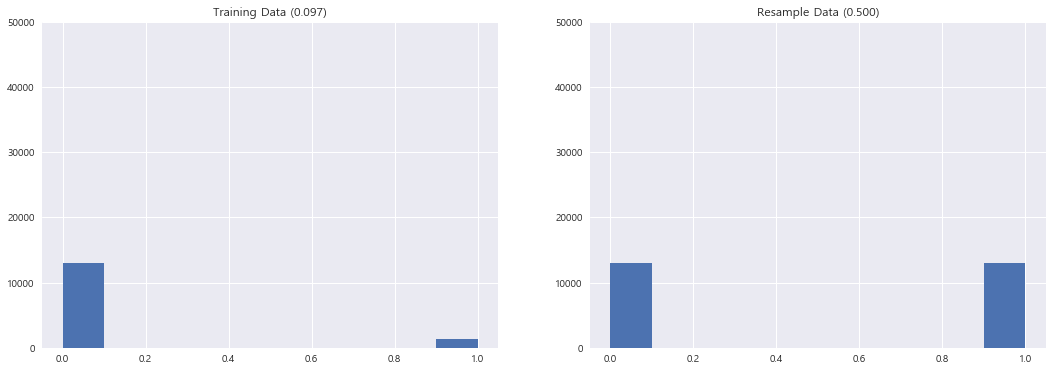

In [66]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.hist(y_train)
plt.ylim(0, 50000)
plt.title('Training Data ({:.3f})'.format(np.mean(train_y)))
plt.subplot(122)
plt.hist(y_resampled)
plt.ylim(0, 50000)
plt.title('Resample Data ({:.3f})'.format(np.mean(y_resampled)))

## 나이브 베이지안 분류기 적용

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_resampled, y_resampled)
predict_nb = nb.predict(test_x)
print(accuracy_score(test_y, predict_nb))
print(f1_score(test_y, predict_nb))

0.9464947622884771
0.7735334242837654


In [84]:
baek_test = ['급등','주가','종목','삼성전자','목표 기능','섬유화 조직']
test_baek = vectorizer.transform(baek_test)
print(test_baek)

  (0, 1713)	1.0
  (1, 12855)	1.0
  (2, 12823)	1.0
  (4, 4669)	0.6149406454774985
  (4, 1759)	0.7885733970530059
  (5, 12762)	0.5746701394419722
  (5, 7280)	0.8183851360048912


In [123]:
spam_token_test = vectorizer.transform(spam_docs)

In [131]:
predict_baek = nb.predict(spam_token_test)
count = 0
for idx in range(len(predict_baek)) :
    if predict_baek[idx]==1 :
        count +=1
print(count)

1868


In [107]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_resampled, y_resampled)
predict_bnb = bnb.predict(test_x)
print(accuracy_score(test_y, predict_bnb))
print(f1_score(test_y, predict_bnb))

0.971474617244158
0.8415398388540734


In [115]:
baek_test = ['공개','확인','급등 수혜 연결 재무','확인 바람 요망' , '클릭']
test_baek = vectorizer.transform(baek_test)
print(test_baek)

  (0, 923)	1.0
  (1, 16515)	1.0
  (2, 11964)	0.5896685592834195
  (2, 9421)	0.5174359959418152
  (2, 7880)	0.5273600362425629
  (2, 1713)	0.3262550727123805
  (3, 16515)	0.4563948673312877
  (3, 5081)	0.8897773457858186
  (4, 14574)	1.0


In [109]:
spam_token_test = vectorizer.transform(spam_tokens)

In [129]:
predict_baek = bnb.predict(spam_token_test)
count = 0
for idx in range(len(predict_baek)) :
    if predict_baek[idx]==1 :
        count +=1
print(count)

1593


## 랜덤포레스트 적용

In [86]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
predict_rf = rf.predict(test_x)
print(accuracy_score(test_y, predict_rf))
print(f1_score(test_y, predict_rf))

C:\Users\HANWHALIFE\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9817888799355359
0.9035012809564474


In [89]:
baek_test = ['급등','주가','종목','삼성전자','목표 기능','섬유화 조직']
test_baek = vectorizer.transform(baek_test)
print(test_baek)

  (0, 1713)	1.0
  (1, 12855)	1.0
  (2, 12823)	1.0
  (4, 4669)	0.6149406454774985
  (4, 1759)	0.7885733970530059
  (5, 12762)	0.5746701394419722
  (5, 7280)	0.8183851360048912


In [132]:
predict_baek = rf.predict(spam_token_test)
count = 0
for idx in range(len(predict_baek)) :
    if predict_baek[idx]==1 :
        count +=1
print(count)

1920


In [91]:
import itertools
from itertools import chain

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

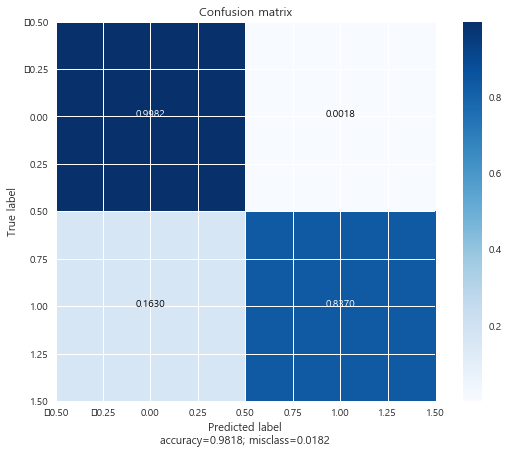

In [92]:
plot_confusion_matrix(confusion_matrix(test_y,predict_rf))

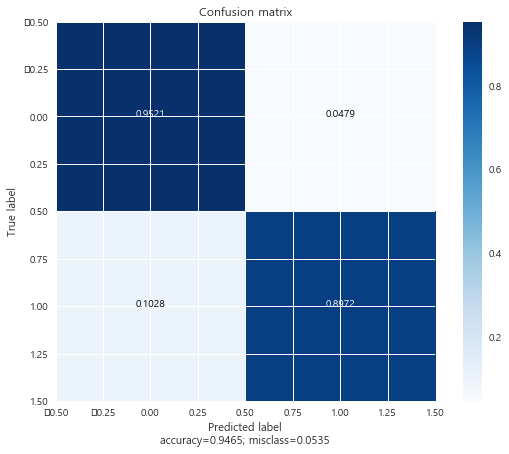

In [93]:
plot_confusion_matrix(confusion_matrix(test_y,predict_nb))

## Target값 분석

In [94]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [95]:
spam_sents = data[data['target']==1].sents.tolist()

In [119]:
spam_sents

[['정부',
  '정책',
  '최대',
  '혜주',
  '공개',
  '바로',
  '확인',
  '매수',
  '수익',
  '인생역전',
  '종목',
  '막차',
  '분',
  '클릭',
  '증시',
  '이벤트',
  '상승',
  '유력',
  '평가',
  '우량',
  '선착순',
  '공개',
  '확인',
  '서울',
  '경제',
  '무단',
  '재',
  '및',
  '재',
  '배포',
  '금지',
  '오전',
  '서울',
  '소공동',
  '롯데',
  '면세점'],
 ['수익', '확대', '수소', '전기차', '핵심', '혜주', '클릭'],
 ['투자', '포인트', '정부', '정책', '최대', '수혜'],
 ['머니투데이',
  '김',
  '도윤',
  '기자',
  '박계현',
  '기자',
  '재테크',
  '올해',
  '공모',
  '규모',
  '최대',
  '수도',
  '모주',
  '투자',
  '꿀팁',
  '공개'],
 ['정부',
  '정책',
  '최대',
  '혜주',
  '공개',
  '바로',
  '확인',
  '매수',
  '수익',
  '인생역전',
  '종목',
  '막차',
  '분',
  '클릭',
  '증시',
  '이벤트',
  '상승',
  '유력',
  '평가',
  '우량',
  '선착순',
  '공개',
  '확인',
  '서울',
  '경제',
  '무단',
  '재',
  '및',
  '재',
  '배포',
  '금지',
  '국민카드',
  '스마트폰',
  '채팅',
  '카드',
  '발급',
  '심사',
  '카드',
  '이용',
  '한도',
  '수'],
 ['신청', '문의', '독자', '서비스', '센터'],
 ['정부',
  '정책',
  '최대',
  '혜주',
  '공개',
  '바로',
  '확인',
  '매수',
  '수익',
  '인생역전',
  '종목',
  '막차',
  '분',
  '클릭',
  '증시',
  '

In [121]:
spam_docs = [' '.join(doc) for doc in spam_sents]

In [122]:
spam_docs

['정부 정책 최대 혜주 공개 바로 확인 매수 수익 인생역전 종목 막차 분 클릭 증시 이벤트 상승 유력 평가 우량 선착순 공개 확인 서울 경제 무단 재 및 재 배포 금지 오전 서울 소공동 롯데 면세점',
 '수익 확대 수소 전기차 핵심 혜주 클릭',
 '투자 포인트 정부 정책 최대 수혜',
 '머니투데이 김 도윤 기자 박계현 기자 재테크 올해 공모 규모 최대 수도 모주 투자 꿀팁 공개',
 '정부 정책 최대 혜주 공개 바로 확인 매수 수익 인생역전 종목 막차 분 클릭 증시 이벤트 상승 유력 평가 우량 선착순 공개 확인 서울 경제 무단 재 및 재 배포 금지 국민카드 스마트폰 채팅 카드 발급 심사 카드 이용 한도 수',
 '신청 문의 독자 서비스 센터',
 '정부 정책 최대 혜주 공개 바로 확인 매수 수익 인생역전 종목 막차 분 클릭 증시 이벤트 상승 유력 평가 우량 선착순 공개 확인 서울 경제 무단 재 및 재 배포 금지 스마트 글로벌 은 충청남도 아산시 토지 건물 양수 결정 공시',
 '정부 정책 최대 혜주 공개 바로 확인 매수 수익 인생역전 종목 막차 분 클릭 증시 이벤트 상승 유력 평가 우량 선착순 공개 확인 서울 경제 무단 재 및 재 배포 금지 제철 지난해 사상 최대 매출 기록 영업 이익 나',
 '정부 정책 최대 혜주 공개 바로 확인 매수 수익 인생역전 종목 막차 분 클릭 증시 이벤트 상승 유력 평가 우량 선착순 공개 확인 서울 경제 무단 재 및 재 배포 금지 자유 한국 당 대표 선출 전당대회 가운데 유력 당권 주자 황교안 전 국무총리 오세훈 전 서울시장 책임 당원 피선거권 지적 제기 논란 일',
 '정부 정책 최대 혜주 공개 바로 확인 매수 수익 인생역전 종목 막차 분 클릭 증시 이벤트 상승 유력 평가 우량 선착순 공개 확인 서울 경제 무단 재 및 재 배포 금지 아이엠 텍 은 원 운영 자금 조달 위해 무기명 권부 무 보증 사모 전환사채 발행 결정 공시',
 '정부 정책 최대 혜주 공개 바로 확인 매수 수익 인생역전 종목 막차 분 클릭 증시 이벤트 상승 

In [96]:
spam_tokens = []
for idx in range(0,len(spam_sents)) :
    spam_tokens += spam_sents[idx]

In [97]:
spam_tokens

['정부',
 '정책',
 '최대',
 '혜주',
 '공개',
 '바로',
 '확인',
 '매수',
 '수익',
 '인생역전',
 '종목',
 '막차',
 '분',
 '클릭',
 '증시',
 '이벤트',
 '상승',
 '유력',
 '평가',
 '우량',
 '선착순',
 '공개',
 '확인',
 '서울',
 '경제',
 '무단',
 '재',
 '및',
 '재',
 '배포',
 '금지',
 '오전',
 '서울',
 '소공동',
 '롯데',
 '면세점',
 '수익',
 '확대',
 '수소',
 '전기차',
 '핵심',
 '혜주',
 '클릭',
 '투자',
 '포인트',
 '정부',
 '정책',
 '최대',
 '수혜',
 '머니투데이',
 '김',
 '도윤',
 '기자',
 '박계현',
 '기자',
 '재테크',
 '올해',
 '공모',
 '규모',
 '최대',
 '수도',
 '모주',
 '투자',
 '꿀팁',
 '공개',
 '정부',
 '정책',
 '최대',
 '혜주',
 '공개',
 '바로',
 '확인',
 '매수',
 '수익',
 '인생역전',
 '종목',
 '막차',
 '분',
 '클릭',
 '증시',
 '이벤트',
 '상승',
 '유력',
 '평가',
 '우량',
 '선착순',
 '공개',
 '확인',
 '서울',
 '경제',
 '무단',
 '재',
 '및',
 '재',
 '배포',
 '금지',
 '국민카드',
 '스마트폰',
 '채팅',
 '카드',
 '발급',
 '심사',
 '카드',
 '이용',
 '한도',
 '수',
 '신청',
 '문의',
 '독자',
 '서비스',
 '센터',
 '정부',
 '정책',
 '최대',
 '혜주',
 '공개',
 '바로',
 '확인',
 '매수',
 '수익',
 '인생역전',
 '종목',
 '막차',
 '분',
 '클릭',
 '증시',
 '이벤트',
 '상승',
 '유력',
 '평가',
 '우량',
 '선착순',
 '공개',
 '확인',
 '서울',
 '경제',
 '무단',
 '재',
 '및',
 '재',
 '배포',
 

In [304]:
spam_nltk = nltk.Text(spam_tokens)

In [306]:
spam_nltk

<Text: 정부 정책 최대 혜주 공개 바로 확인 매수...>

In [307]:
spam_nltk.vocab().most_common(20)

[('공개', 2968),
 ('확인', 1726),
 ('재', 1684),
 ('매수', 1507),
 ('정부', 1291),
 ('정책', 1266),
 ('혜주', 1212),
 ('종목', 1190),
 ('상승', 1160),
 ('선착순', 1101),
 ('증시', 1094),
 ('서울', 1017),
 ('경제', 1008),
 ('및', 951),
 ('수익', 925),
 ('급등', 917),
 ('클릭', 915),
 ('평가', 864),
 ('이벤트', 858),
 ('무단', 839)]